# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [1]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [2]:
df_obesity = pd.read_excel("obesity_cleaned.xlsx", index_col=0)

In [3]:
df_obesity.head()

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male


- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [4]:
df_obesity["Obesity"] = df_obesity["Obesity (%)"].str.split(' ').str[0]

In [5]:
df_obesity.loc[df_obesity["Obesity"] == "No", "Obesity"] = np.nan
df_obesity["Obesity"] = df_obesity["Obesity"].dropna()

In [6]:
df_obesity["Obesity"] = df_obesity["Obesity"].apply(lambda x: float(x))
df_obesity["Year"] = df_obesity["Year"].apply(lambda x: int(x))

In [7]:
df_obesity.set_index("Year", inplace=True)

In [8]:
df_obesity.dtypes

Country         object
Obesity (%)     object
Sex             object
Obesity        float64
dtype: object

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [9]:
df_obesity[df_obesity.index == 2015].groupby("Sex").mean("Obesity")

,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [10]:
df_obesity_start = df_obesity[df_obesity.index == 1975]
df_obesity_end = df_obesity[df_obesity.index == 2016]

In [11]:
df_obesity_start.set_index("Country", inplace=True)
df_obesity_end.set_index("Country", inplace=True)

In [12]:
df_obesity_ev = df_obesity_end[df_obesity_end["Sex"] == "Both sexes"]["Obesity"] - df_obesity_start[df_obesity_start["Sex"] == "Both sexes"]["Obesity"]

In [13]:
df_obesity_ev.sort_values().dropna().head(5)

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [14]:
df_obesity_ev.sort_values().dropna().tail(5)

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [15]:
df_2015 = df_obesity[df_obesity.index == 2015]

In [16]:
df_2015[df_2015["Obesity"] == df_2015["Obesity"].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


In [17]:
df_2015[df_2015["Obesity"] == df_2015["Obesity"].min()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Viet Nam,1.5 [0.8-2.5],Male,1.5


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [18]:
df_brazil = df_obesity[df_obesity["Country"] == "Brazil"]

<Axes: xlabel='Year'>

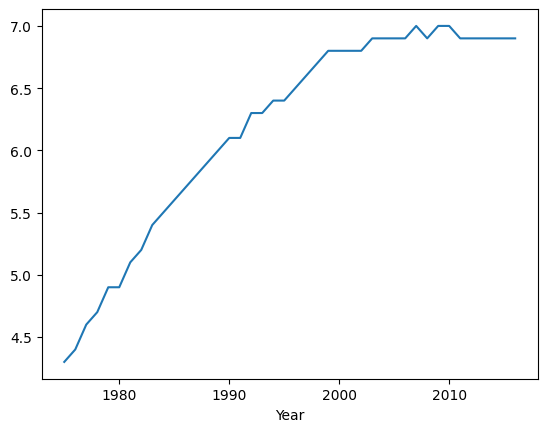

In [19]:
(df_brazil[df_brazil["Sex"] == "Female"]["Obesity"] - df_brazil[df_brazil["Sex"] == "Male"]["Obesity"]).plot()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [20]:
df_both = df_obesity[df_obesity["Sex"] == "Both sexes"]

<Axes: xlabel='Year'>

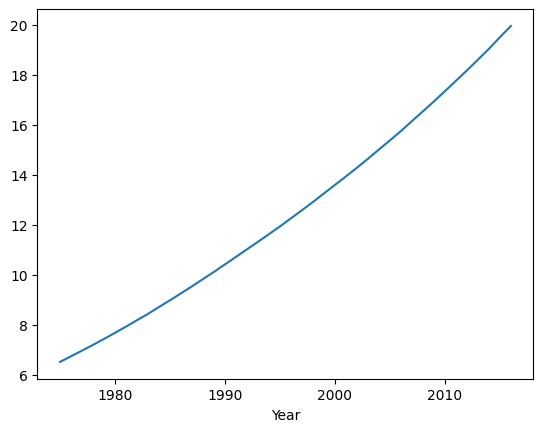

In [21]:
df_both.groupby("Year")["Obesity"].mean().plot()

- Extra: Gráfico comparativo entre as evoluções por sexo no mundo

In [22]:
df_sexes = df_obesity[df_obesity["Sex"] == "Female"].copy()
df_sexes.rename(columns={"Obesity": "Obesity_F"}, inplace=True)
df_sexes["Obesity_M"] = df_obesity[df_obesity["Sex"] == "Male"]["Obesity"]
df_sexes.drop(columns=["Obesity (%)", "Sex"], inplace=True)

<Axes: xlabel='Year'>

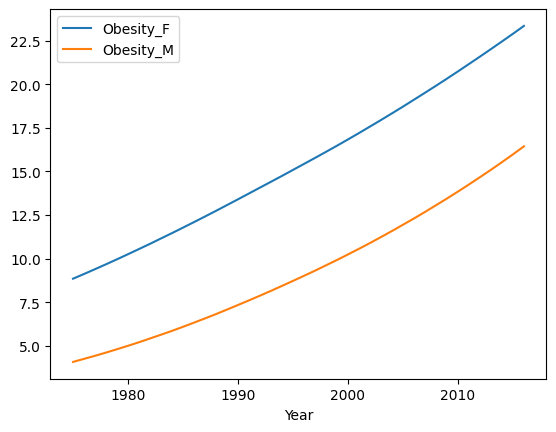

In [23]:
df_sexes.groupby("Year")[["Obesity_F", "Obesity_M"]].mean().plot()

## Perguntas - GDP Per Person (1901-2011)

In [24]:
df_gdp = pd.read_csv("Datasets/GDP.csv", decimal=".")

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/GDP.csv'

- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

- Você conseguiria informar o primeiro valor registrado de cada país?

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

- Há uma relação entre níveis de obesidade e gdp per capita?